# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Fixed Acidity: This refers to the concentration of nonvolatile acids in the wine. It can influence the wine's taste and tartness. 

Volatile Acidity: This measures the concentration of volatile acids in the wine. Excessive volatile acidity can lead to undesirable flavors, such as 

vinegar-like aromas, which negatively impact wine quality.

Citric Acid: Citric acid contributes to the freshness and tartness of the wine. It's an important component for enhancing the wine's overall flavor profile.

Residual Sugar: This refers to the amount of sugar that remains in the wine after fermentation.

Chlorides: Chloride content affects the wine's saltiness and can impact the overall taste perception.

Free Sulfur Dioxide: Sulfur dioxide is used as a preservative in wine.

Density: Density is related to the wine's alcohol and sugar content. It can give insights into the wine's overall composition and body.

# Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Checking for missing values inside the dataset

In [21]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

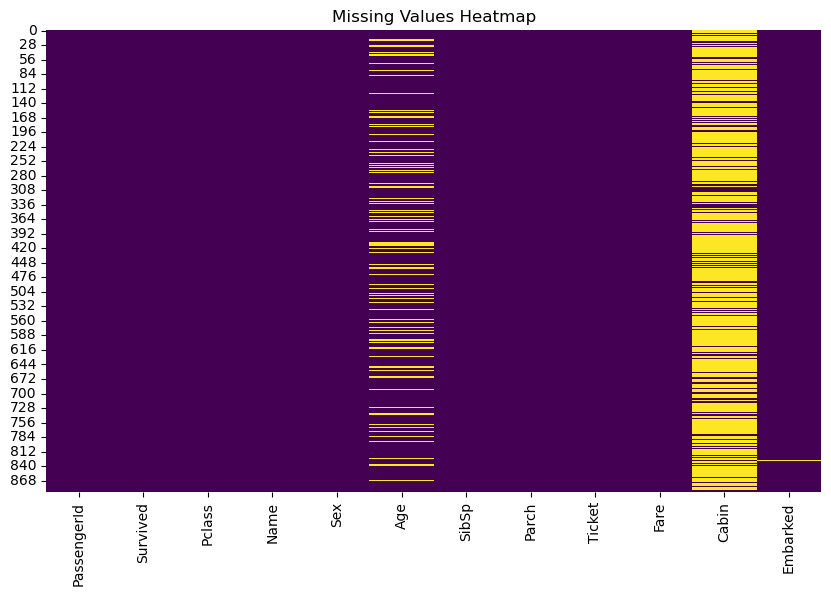

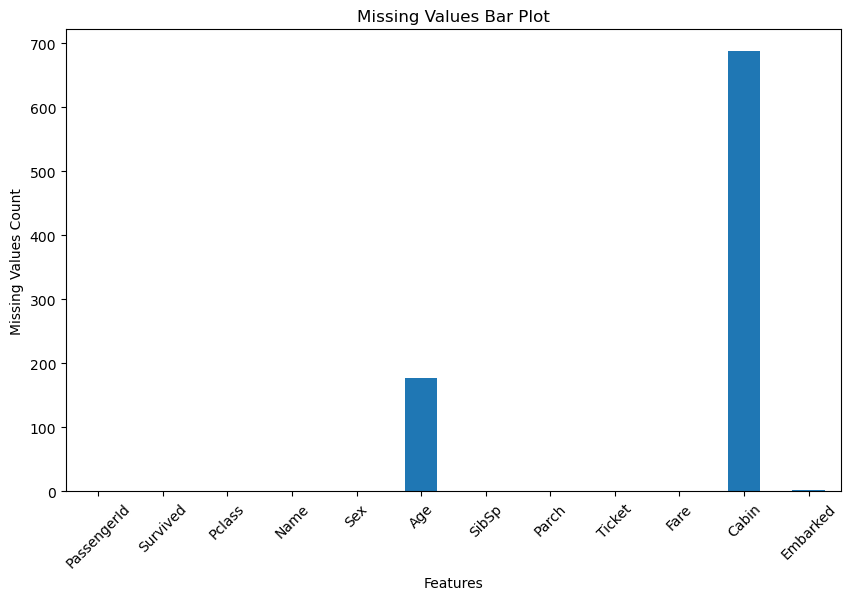

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file)
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Create a missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Alternatively, create a missing value bar plot
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values Bar Plot')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()


There are two ways to handle missing values-

Dropping Missing Values

Imputing Missing Values With Some Other Value (Preferred)

1. Dropping Missing Values

if missing values is of type Missing At Random(MAR) or Missing Completly At Random(MCAR) then it can be deleted.
One of the biggest disadvantage of dropping missing values is one might end up deleting some useful data as well with missing values.
There are two ways to remove missing values

Deleting the entire row containing missing values

Deleting the entire column containing missing values

1. Deleting The Entire Row

In [25]:
## Copy of data
new = df.copy()
new= new.dropna(axis=0)
new.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
print('Dataset Size Without Missing Values',new.shape)

Dataset Size Without Missing Values (183, 12)


In [27]:
print('Dataset Size Without Missing Values',df.shape)

Dataset Size Without Missing Values (891, 12)


2. Deleting The Entire Column

In [28]:
## Copy of data
new1 = df.copy()
new1 = new1.drop(['Cabin','Age','Embarked'],axis=1) 
new1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

2. Imputing Missing Values

METHOD 1 → Mean Value Imputation

/tmp/ipykernel_77/1908697896.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age);


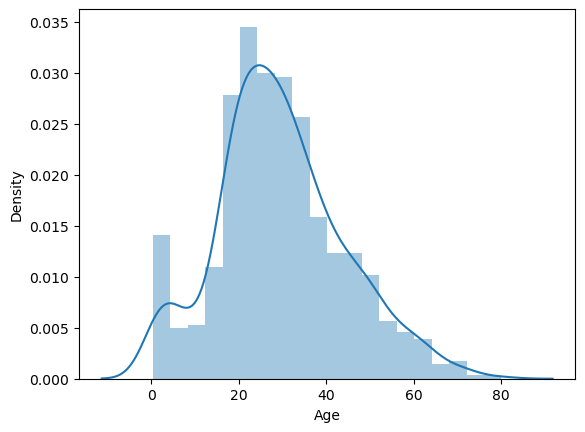

In [29]:
## First Step : Check The Distribution
sns.distplot(df.Age);

METHOD 2: Median Value Imputation
In this technique we replace all the missing value with median value of the column

In [1]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [2]:
def impute_nan_median(df,column,median):
    df[column+'_median'] = df[column].fillna(median)
    return df

median_val = titanic_data.Age.median()
titanic = impute_nan_median(titanic_data,'Age',median_val)

In [3]:
titanic_data[titanic_data.Age.isna()][['Age','Age_median']]

,Age,Age_median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
...,...,...
859,NaN,28.0
863,NaN,28.0
868,NaN,28.0
878,NaN,28.0


METHOD 3: Mode Imputation (Frequent Category Imputation)
Mode value imputation is mostly used for categorical data. it can also be used for numerical variables as well.

In this technique we replace all the missing values with the most frequent value of the column.

In [4]:
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = titanic_data.Age.mode()
titanic_data = impute_nan_mode(titanic_data,'Age',mode_val)

In [5]:
titanic_data[titanic_data.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,NaN
17,NaN,NaN
19,NaN,NaN
26,NaN,NaN
28,NaN,NaN
...,...,...
859,NaN,NaN
863,NaN,NaN
868,NaN,NaN
878,NaN,NaN


METHOD 4: Arbitrary Value Imputation (Numerical)¶

In this method we replace missing value with lowest or highest value of the distribution. (-infinity, +infinity)

In case of Age we can replace missing values either with 0 or 100.(least and highest)

This method not only fill missing values but also captures the importance of it.

In [6]:
### Filling Values using 0
titanic_data['Age_0'] = titanic_data['Age'].fillna(0)
### Filling Values using 100
titanic_data['Age_100'] = titanic_data['Age'].fillna(100)
titanic_data[titanic_data.Age.isna()][['Age','Age_0','Age_100']]

,Age,Age_0,Age_100
5,NaN,0.0,100.0
17,NaN,0.0,100.0
19,NaN,0.0,100.0
26,NaN,0.0,100.0
28,NaN,0.0,100.0
...,...,...,...
859,NaN,0.0,100.0
863,NaN,0.0,100.0
868,NaN,0.0,100.0
878,NaN,0.0,100.0


METHOD 5: Arbitrary Value Imputation (Categorical)

In [7]:
titanic_data['Cabin_Missing'] = titanic_data['Cabin'].fillna('Missing')
titanic_data[titanic_data.Cabin.isna()][['Cabin','Cabin_Missing']]

,Cabin,Cabin_Missing
0,NaN,Missing
2,NaN,Missing
4,NaN,Missing
5,NaN,Missing
7,NaN,Missing
...,...,...
884,NaN,Missing
885,NaN,Missing
886,NaN,Missing
888,NaN,Missing


# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Factors affecting exams reading score,writing score and math score.

In [9]:
import pandas as pd                #Data Processing
import numpy as np                 # Linear Algebra
import matplotlib.pyplot as plt    # Data Visualization
import seaborn as sns              # Data Visualization

%matplotlib inline
df = pd.read_csv('stud.csv')

/tmp/ipykernel_84/3357575769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math_score'], kde = False, color='m', bins = 30)


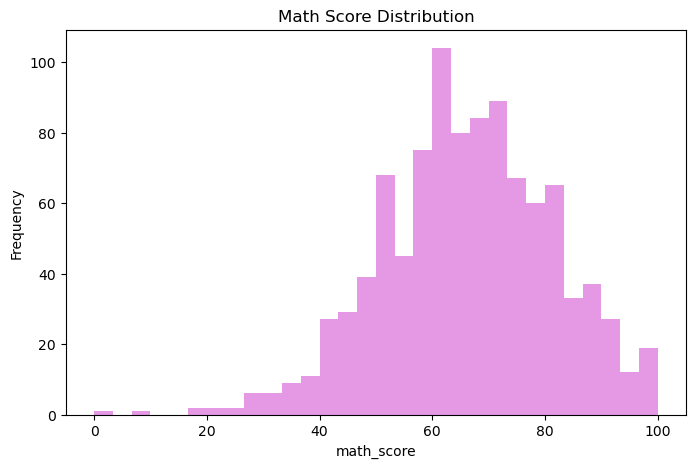

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(df['math_score'], kde = False, color='m', bins = 30)
plt.ylabel('Frequency')
plt.title('Math Score Distribution')
plt.show()

/tmp/ipykernel_84/2380816168.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading_score'], kde = False, color='r', bins = 30)


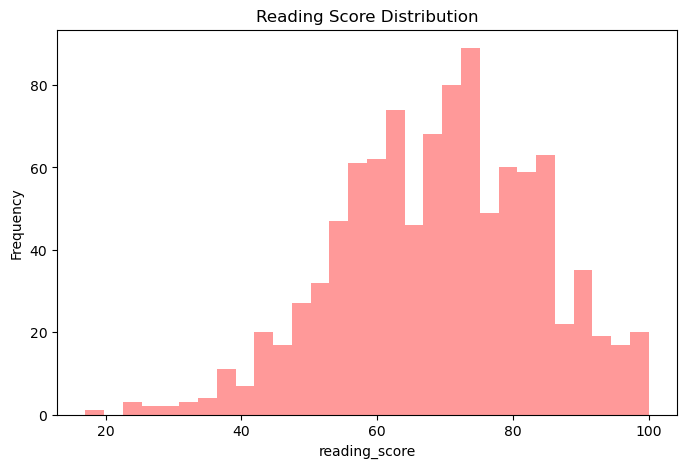

In [12]:
plt.figure(figsize=(8,5))
sns.distplot(df['reading_score'], kde = False, color='r', bins = 30)
plt.ylabel('Frequency')
plt.title('Reading Score Distribution')
plt.show()


/tmp/ipykernel_84/4076690373.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing_score'], kde = False, color='blue', bins = 30)


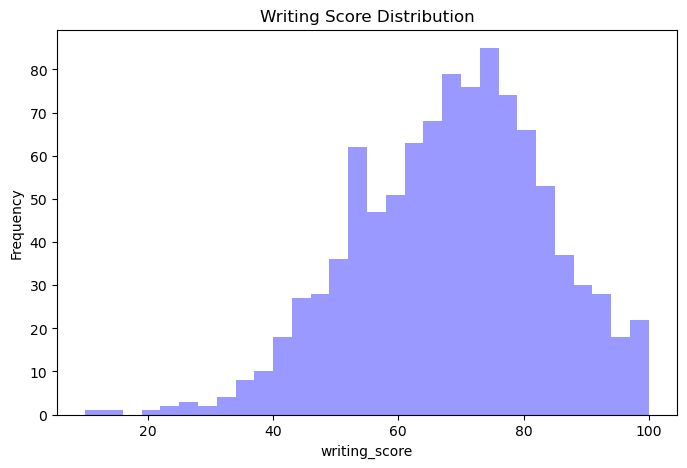

In [13]:
plt.figure(figsize=(8,5))
sns.distplot(df['writing_score'], kde = False, color='blue', bins = 30)
plt.ylabel('Frequency')
plt.title('Writing Score Distribution')
plt.show()

In [15]:
# 1. Maximum & Minimum score in Math
print('Maximum score in Maths is: ',max(df['math_score']))
print('Minimum score in Maths is: ',min(df['math_score']))

Maximum score in Maths is:  100
Minimum score in Maths is:  0


In [16]:
# 2. Maximum & Minimum score in Reading
print('Maximum score in Reading is: ',max(df['reading_score']))
print('Minimum score in Reading is: ',min(df['reading_score']))

Maximum score in Reading is:  100
Minimum score in Reading is:  17


In [17]:
# 3. Maximum & Minimum score in Writing
print('Maximum score in Writing is: ',max(df['writing_score']))
print('Mimimum score in Writing is: ',min(df['writing_score']))

Maximum score in Writing is:  100
Mimimum score in Writing is:  10


In [19]:
# 7. Number of Students having maximum marks in all three categories
perfect_writing = df['writing_score'] == 100
perfect_reading = df['reading_score'] == 100
perfect_math = df['math_score'] == 100

perfect_score = df[(perfect_math) & (perfect_reading) & (perfect_writing)]
perfect_score

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [20]:
# Number of Students having minimum marks in all three categories
minimum_math = df['math_score'] == 0
minimum_reading = df['reading_score'] == 17
minimum_writing = df['writing_score'] == 10



minimum_score = df[(minimum_math) & (minimum_reading) & (minimum_writing)]
minimum_score

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10


In [21]:
# Function to assign grades

def get_grade(marks):
    if marks >= 91:
        return 'O'
    elif marks >= 82 and marks < 91:
        return 'A+'
    elif marks >=73 and marks < 82:
        return 'A'
    elif marks >=64 and marks < 73:
        return 'B+'
    elif marks >= 55 and marks < 64:
        return 'B'
    elif marks >=46 and marks < 55:
        return 'C'
    elif marks >= 35 and marks < 46:
        return 'P'
    elif marks < 35:
        return 'F'
    
df['reading_grade'] = df['reading_score'].apply(get_grade)
df['writing_grade'] = df['writing_score'].apply(get_grade)
df['math_grade'] = df['math_score'].apply(get_grade)

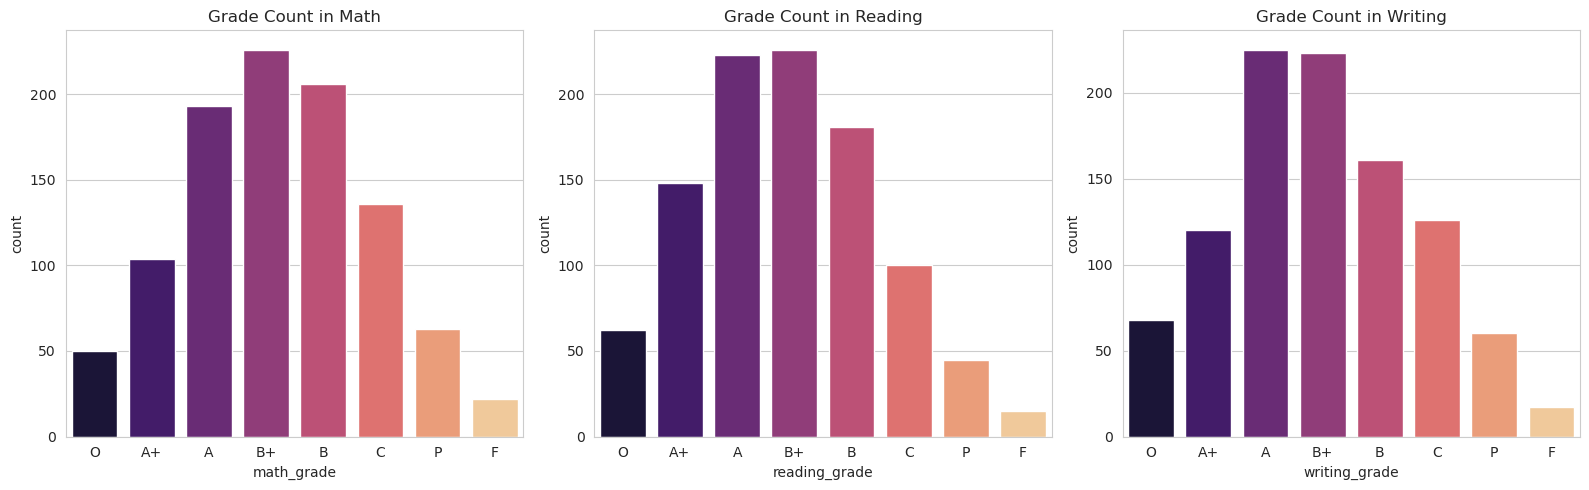

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(x ='math_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Math')


plt.subplot(1,3,2)
sns.countplot(x ='reading_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Reading')

plt.subplot(1,3,3)
sns.countplot(x ='writing_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Writing')

plt.tight_layout()

# Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Feature engineering is the process of selecting, transforming, extracting, combining, and manipulating raw data to generate the desired variables for analysis or predictive modeling. It is a crucial step in developing a machine learning model.

1. Data Cleansing

Data cleansing is the process of dealing with errors or inconsistencies in the data. This step involves identifying incorrect data, missing data, duplicated data, and irrelevant data. Moreover, Data cleansing is the process of deleting, replacing, or modifying data to remove outliers and incorrect values.

2. Data Transformation

Data transformation is the process of transforming the data from one layout to another.There are several techniques to transform the data depending on the desired outcome:

Transformation: Transformation refers to the application of a mathematical function to every data point. Transformation is a great way to handle highly skewed data.

Standardization: Standardization refers to the process of converting the data into a uniform format. Data standardization is a great way of handling data with different units.

Data Encoding: Encoding refers to the process of converting categorical variables to numerical variables. Data encoding is a great way of handling nominal and ordinal variables.

3. Feature Extraction

Feature extraction is the process of extracting new features from the existing attributes. This process is primarily concerned with reducing the number of features in the model. Feature extraction can be a lengthy process that requires the use of advanced analytics techniques (e.g., Principal Component Analysis).

4. Feature Selection

Feature selection is the process of selecting the correct subset of features to ensure that the most relationship with the target variable is captured. It consists of eliminating features that do not explain the behavior of the target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_excel('flight_price.xlsx')

In [2]:
df['Arrival_Hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]

In [3]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [6]:
import pandas as pd
df=pd.read_csv('winequality-red.csv')

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report
from scipy import stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(12,3,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns",fontsize=50)

Text(0.5, 0.98, 'Visualizing continuous columns')

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

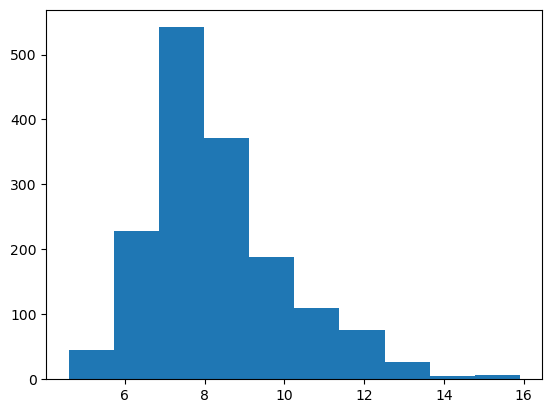

In [20]:
plt.hist(df['fixed acidity'],bins=10)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64 

Index(['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity',
       'residual sugar', 'free sulfur dioxide', 'pH', 'chlorides', 'density'],
      dtype='object')


<AxesSubplot: >

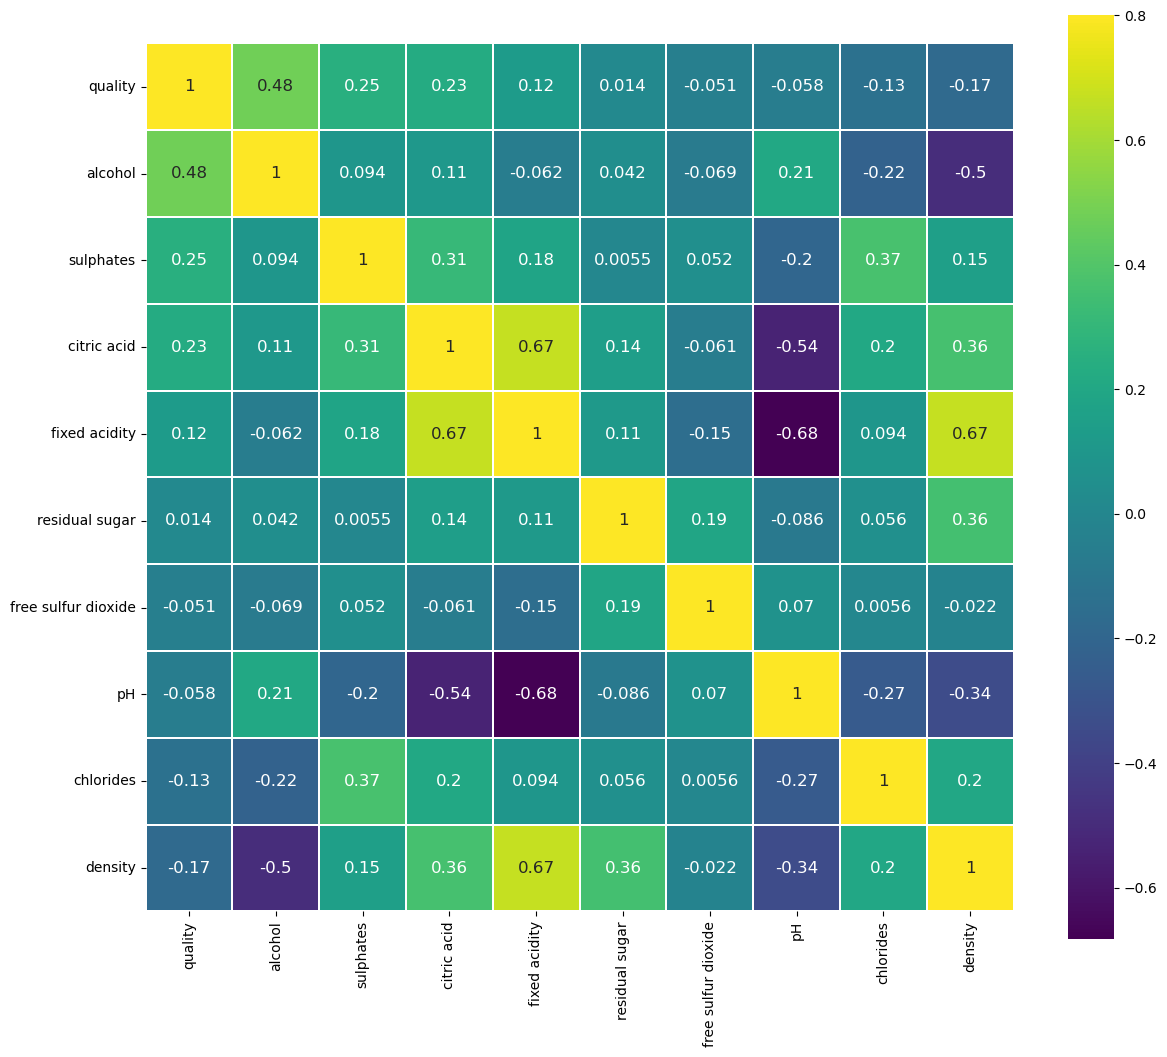

In [27]:
correlation = df.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [11]:
from imblearn.over_sampling import SMOTE 
oversample = SMOTE()
features, labels=  oversample.fit_resample(df.drop(["quality"],axis=1),df["quality"])
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


From the above equation, we can see that an increase in alcohol, fixed acidity, and sulphate will improve the quality of the red wine whereas other attributes such as chlorides, sulfur dioxide, volatile acidity, pH in large quantities will decrease the quality of the red wine.

In [13]:
#Using min-max scaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
data = pd.read_csv('winequality-red.csv')

# Select the numerical features you want to normalize
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Now data[numerical_features] contains the normalized values


In [14]:
data[numerical_features]

,fixed acidity,volatile acidity,citric acid
0,0.247788,0.397260,0.00
1,0.283186,0.520548,0.00
2,0.283186,0.438356,0.04
3,0.584071,0.109589,0.56
4,0.247788,0.397260,0.00
...,...,...,...
1594,0.141593,0.328767,0.08
1595,0.115044,0.294521,0.10
1596,0.150442,0.267123,0.13
1597,0.115044,0.359589,0.12


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('winequality-red.csv')

# Select the numerical features you want to standardize
numerical_features = ['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [2]:
data[numerical_features]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


# Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine quality dataset
data = pd.read_csv('winequality-red.csv')

# Separate features from the target variable
X = data.drop('quality', axis=1)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the minimum number of components for 90% variance
num_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f"Number of components for 90% variance: {num_components}")


Number of components for 90% variance: 7
